***
# 5. Introduction to Python in Jupyter - Plotting
>-how to read and clean tabular data<br>
-how to plot data

# 5.1 Example - Temperature changes in Quebec - Part II
***
From [Environment Canada](https://www.canada.ca/en/environment-climate-change/services/environmental-indicators/temperature-change.html): <br>

>_ *"Changes in climate variables such as temperature, precipitation and humidity affect a wide range of natural processes and human activities. For example, temperature change can influence crops, forests, infrastructure, the spread of disease, the availability of water and the health of ecosystems. Temperature is also a key indicator of how the climate is changing in response to human emissions of greenhouse gases (GHGs), as increasing GHG concentrations result in warming of the lower atmosphere."* 

>_ *"The annual average temperature in Canada has increased at roughly twice the global mean rate. Patterns are different across regions of the country however. Temperatures have increased more in northern Canada than in southern Canada. Annual mean temperature over northern Canada increased by roughly 3 times the global mean warming rate."*

***
### ***`Question: How did the temperature change in some cities in Quebec?`***
***

### Part II: Explore and plot temperature data from Environment Canada. 

We will download weather data from a few cities in Quebec. <br>
The data can be downloaded from Environment Canada through an URL wget request. <br>
The information about the process is available from this [google drive](https://drive.google.com/drive/folders/1WJCDEU34c60IfOnG4rv5EPZ4IhhW9vZH) from Environment Canada

In [1]:
# Import relevant libraries
import pandas as pd
import io
import requests

In [2]:
# We will now download some climate data for a specific station in Quebec, for a specific year
# Determine the parameters to be used in the URL request
ID = '5217' # the station ID, this info is available in the StationInventoryEN2022.csv file (I downloaded this file file from the Environment Canada Google drive)
year = '2010' # Specify the year
filename = "./data/" + "Station" + ID + "_" + year + ".csv" # Create a filename that consists of part of the parameters

In [9]:
# Send the data request to Environment Canada through URL get. 
# Timeframe=2 (month is one value) refers to daily data.Timeframe = 3 refers to monthly data. 
# Timeframe is 3, and month is x (one value) gives the entire historic dataset for the station
url="http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={}&Year={}&Month=3&Day=14&timeframe=2&submit= Download+Data".format(ID,year)
s=requests.get(url).content
h=pd.read_csv(io.StringIO(s.decode('utf-8')))
h.to_csv(filename, encoding='utf-8', index=False)

In [4]:
#print (h)

In [3]:
# This function will call the Environment Canada API
# Returns a dataframe of data
# Daily data will be downloaded (timeframe =2, month is one value)

def getDailyData(stationID, year):
    base_url = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?"
    query_url = "format=csv&stationID={}&Year={}&Month=3&timeframe=2".format(stationID, year)
    api_endpoint = base_url + query_url
    return pd.read_csv(api_endpoint, skiprows=0)

In [17]:
# Specify the Weather station ID and download multiple years for the weather station

ID = '5217' # we will run this script for station IDs 5217, 10873, 5440, and 5836
frames = [] # empty square brackets are used to define a new array
for year in range (1990, 2021):
    #print(ID, year)
    outAll = "./data/" + "StationDaily2" + ID + ".csv" # specify the name of the output file,it will hold the appended file (all years)
    df = getDailyData(ID, year)  # call the function within the Loop, the dataframe with results will be saved to the variable df
    frames.append(df) # add the data from df to the frames array
    
weather_data = pd.concat(frames)  # weather data holds the appended data (multiple years)
weather_data.to_csv(outAll)#, sep='\t') # save the appended data to disk

***
***Creating lists (useful for Loops)***
***

In [4]:
# If you want to create a list based on another folder you can change directories using the following functions
import os
os.getcwd() #get the current directory

'/home/jupyter/LEADS_Python_Jupyter'

In [5]:
# Change directory to subfolder
os.chdir('/home/jupyter/LEADS_Python_Jupyter/data/')
os.getcwd() #get the current directory
!dir #shows the content of the <data> folder

climate.csv	 CSD_Qc_2006.shp.xml	      StationDaily10873.csv
CSD_Qc_2006.dbf  CSD_Qc_2006.shx	      StationDaily5217.csv
CSD_Qc_2006.prj  CSD_Qc_2006.zip	      StationDaily5440.csv
CSD_Qc_2006.sbn  inPlot			      StationDaily5836.csv
CSD_Qc_2006.sbx  monthly_in_situ_co2_mlo.csv  StationInventoryEN2022.csv
CSD_Qc_2006.shp  Station5217_2010.csv	      StationsQC.csv


In [6]:
!dir *Daily*.csv

StationDaily10873.csv  StationDaily5440.csv
StationDaily5217.csv   StationDaily5836.csv


In [7]:
files = !dir *Daily*.csv
print(files)

['StationDaily10873.csv  StationDaily5440.csv', 'StationDaily5217.csv   StationDaily5836.csv']


***
***Let's plot some data!***
***

In [1]:
# Import relevant libraries
import pandas as pd
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

# Read the data into a variable
DailyWeather= pd.read_csv('Station5217_2010.csv', index_col=4, parse_dates=True, 
date_parser=dateparse)

In [2]:
#Information about the data
DailyWeather.dtypes

Longitude (x)                float64
Latitude (y)                 float64
Station Name                  object
Climate ID                     int64
Year                           int64
Month                          int64
Day                            int64
Data Quality                 float64
Max Temp (°C)                float64
Max Temp Flag                 object
Min Temp (°C)                float64
Min Temp Flag                 object
Mean Temp (°C)               float64
Mean Temp Flag                object
Heat Deg Days (°C)           float64
Heat Deg Days Flag            object
Cool Deg Days (°C)           float64
Cool Deg Days Flag            object
Total Rain (mm)              float64
Total Rain Flag               object
Total Snow (cm)              float64
Total Snow Flag               object
Total Precip (mm)            float64
Total Precip Flag             object
Snow on Grnd (cm)            float64
Snow on Grnd Flag             object
Dir of Max Gust (10s deg)    float64
D

NameError: name 'ID' is not defined

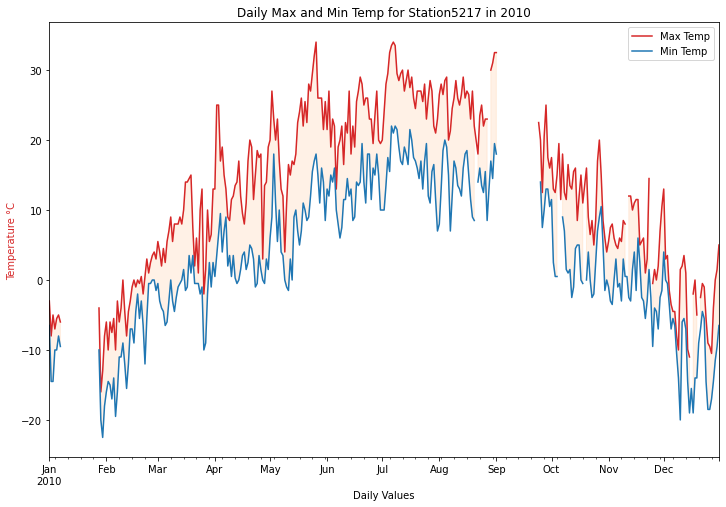

In [4]:
# First type of plot showing within year variations
# Import relevant libraries for plotting

import numpy as np 
import matplotlib.pyplot as plt 
ID = 5217 Coteau Du Lac
year = 2010

# Creating plot with dataset_1
fig, ax1 = plt.subplots() 

# set color 
color = 'tab:red'

# set labels 
ax1.set_xlabel('Date') 
ax1.set_ylabel('Max Temp (°C)', color = color) 

# Adding title
#plt.title('Use different y-axes on the left and right of a Matplotlib plot', fontweight ="bold") 
ax1.set_title('Daily Max and Min Temp for Station 5217 - Coteau du lac - in 2010')

# plot the min and max lines
ax =  DailyWeather['Max Temp (°C)'].plot(label='Max Temp', color='tab:red', figsize=(12, 8))
DailyWeather['Min Temp (°C)'].plot(ax=ax, label='Min Temp', color='tab:blue')

# add the fill, between min and max
plt.fill_between(DailyWeather.index, DailyWeather['Max Temp (°C)'], DailyWeather['Min Temp (°C)'], alpha=0.10, color='tab:orange')

# plot cosmetics
plt.legend()
plt.xlabel('Daily Values')
plt.ylabel('Temperature °C')
plt.title('Daily Max and Min of Weather Station {}'.format(ID + " for " + year))
plt.tight_layout()
plt.show()


In [3]:
# Another type of plot showing annual variations
# Import relevant libraries for plotting

import pandas as pd
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
DailyWeather= pd.read_csv('StationDaily10873.csv', index_col=5, parse_dates=True, 
date_parser=dateparse)

In [1]:
# %debug

In [6]:
DailyWeather.dtypes

Unnamed: 0                     int64
Longitude (x)                float64
Latitude (y)                 float64
Station Name                  object
Climate ID                    object
Year                           int64
Month                          int64
Day                            int64
Data Quality                 float64
Max Temp (°C)                float64
Max Temp Flag                 object
Min Temp (°C)                float64
Min Temp Flag                 object
Mean Temp (°C)               float64
Mean Temp Flag                object
Heat Deg Days (°C)           float64
Heat Deg Days Flag            object
Cool Deg Days (°C)           float64
Cool Deg Days Flag            object
Total Rain (mm)              float64
Total Rain Flag               object
Total Snow (cm)              float64
Total Snow Flag               object
Total Precip (mm)            float64
Total Precip Flag             object
Snow on Grnd (cm)            float64
Snow on Grnd Flag             object
D

In [10]:
DailyWeather

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0,-73.93,45.43,STE-ANNE-DE-BELLEVUE 1,702FHL8,1990,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,1,-73.93,45.43,STE-ANNE-DE-BELLEVUE 1,702FHL8,1990,1,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,2,-73.93,45.43,STE-ANNE-DE-BELLEVUE 1,702FHL8,1990,1,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,3,-73.93,45.43,STE-ANNE-DE-BELLEVUE 1,702FHL8,1990,1,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,4,-73.93,45.43,STE-ANNE-DE-BELLEVUE 1,702FHL8,1990,1,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,361,-73.93,45.43,STE-ANNE-DE-BELLEVUE 1,702FHL8,2020,12,27,NaN,-2.7,...,NaN,NaN,0.2,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-12-28,362,-73.93,45.43,STE-ANNE-DE-BELLEVUE 1,702FHL8,2020,12,28,NaN,5.2,...,NaN,NaN,1.3,NaN,0.0,NaN,22.0,NaN,54.0,NaN
2020-12-29,363,-73.93,45.43,STE-ANNE-DE-BELLEVUE 1,702FHL8,2020,12,29,NaN,-2.7,...,NaN,NaN,0.0,NaN,0.0,NaN,30.0,NaN,39.0,NaN


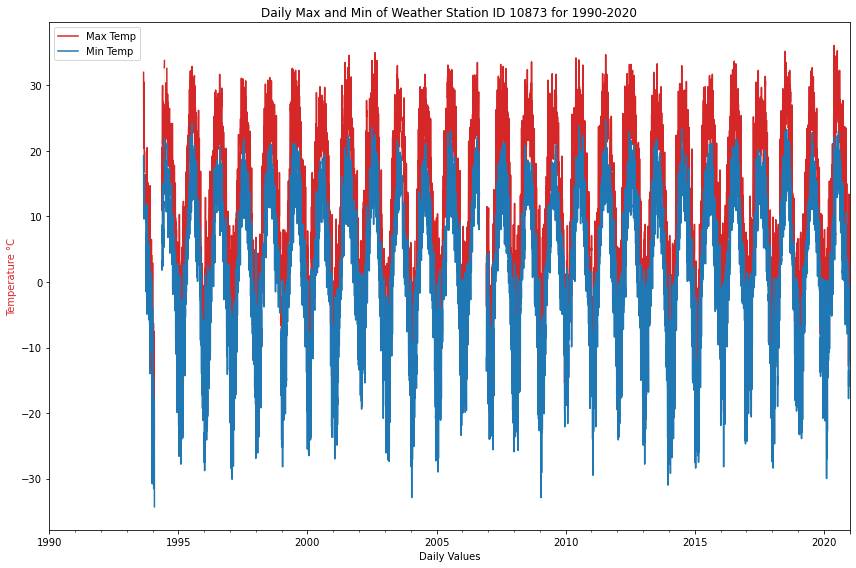

In [4]:
# Import relevant libraries for plotting

import numpy as np 
import matplotlib.pyplot as plt 
 
# Increase size of plot in jupyter
plt.rcParams["figure.figsize"] = (20,10)
    
# Creating plot with dataset_1
fig, ax1 = plt.subplots() 

# set color 
color = 'tab:red'

# set labels 
ax1.set_xlabel('Date') 
ax1.set_ylabel('Max Temp (°C)', color = color) 

# Adding title
#plt.title('Use different y-axes on the left and right of a Matplotlib plot', fontweight ="bold") 
ax1.set_title('Daily Max and Min Temp for Station5217 in 2010')

# plot the min and max lines
ax =  DailyWeather['Max Temp (°C)'].plot(label='Max Temp', color='tab:red', figsize=(12, 8))
DailyWeather['Min Temp (°C)'].plot(ax=ax, label='Min Temp', color='tab:blue')

# add the fill, between min and max
plt.fill_between(DailyWeather.index, DailyWeather['Max Temp (°C)'], DailyWeather['Min Temp (°C)'], alpha=0.10, color='tab:orange')

# plot cosmetics
plt.legend()
plt.xlabel('Daily Values')
plt.ylabel('Temperature °C')
plt.title('Daily Max and Min of Weather Station {}'.format('ID 10873' + " for " + '1990-2020'))
plt.tight_layout()
plt.show()


***
# Calculate mean annual maximum temperatures
***

In [1]:
# Import relevant libraries for plotting
import numpy as np
import pandas as pd

from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [44]:
# Create a function that will loop through a file, and summarize the data for each year (31 years in total)
# Only maximum temperature is summarized

def calculate_annual_average(data):

    years = pd.unique(data["Year"]) # find out the unique years in the dataset, and save them to the variable years
    noYears = len(years) # find out the lenght of the variable, or the number of years in the dataset (31 in this case, from 1990 to 2020)
    means = np.zeros(noYears) # create empty array to hold the results - mean Max temperature
    yearsData = np.zeros(noYears) # create empty array to hold the results - the years
    means_years=np.array([]) # create empty array to hold the results - years and and the mean max temperature
    index = 0 # this index value will be used to save the results to a variable, one line at the time (line at position index!)
    
    for year in years: # Start the loop, read the first year (1990) from the list of years
        indices_current_year = np.where(data["Year"] == year) # find out what the indices are for the current year
        data_current_year = data.iloc[indices_current_year] # find out the data for the current year
        Tmax = data["Max Temp (°C)"] # read the Max Temp data into a variable Tmax
        Tmax_current_year = Tmax.iloc[indices_current_year] # find the Tmax values for the current year
        mean_Tmax_current_year = Tmax_current_year.mean() # calculate the mean T max value of the year           
        means[index] = Tmax_current_year.mean() # save the mean Max T value of the first year (1990) to the first row (index = 0) in the array
        yearsData[index] = year # save the current year (1990) to the first row of the array
        index = index + 1 # go tho the following index value
        
    means_years=np.column_stack((yearsData,means)) # Note, this happends outside of the Loop! Save the arrays with years and mean Max T values
    print(means_years) # print to check
    np.savetxt("Annual.csv", means_years, delimiter=",") # Save the results to disk
    return means, yearsData, means_years # Output of the funtion

### The following lines will run the function for three selected stations
 
We will manually rename the files to the respective stations.
Ideally, you would want to automate this.

In [ ]:
# DailyWeather= pd.read_csv('StationDaily10873.csv', index_col=5, parse_dates=True, 
# date_parser=dateparse)

# result=calculate_annual_average(DailyWeather)

In [ ]:
# DailyWeather= pd.read_csv('StationDaily5440.csv', index_col=5, parse_dates=True, 
# date_parser=dateparse)

# result=calculate_annual_average(DailyWeather)

In [ ]:
# DailyWeather= pd.read_csv('StationDaily5836.csv', index_col=5, parse_dates=True, 
# date_parser=dateparse)

# result=calculate_annual_average(DailyWeather)

***
# End calculation - back to plotting!
***

In [2]:
#Read the files that will be plotted
AnnualWeather10873= pd.read_csv('Annual10873.csv', header=None, usecols=[0,1])
#AnnualWeather10873.dtypes
AnnualWeather10873clean = AnnualWeather10873.dropna()

In [3]:
#Read the files that will be plotted
AnnualWeather5440= pd.read_csv('Annual5440.csv', header=None, usecols=[0,1])
#AnnualWeather10873.dtypes
AnnualWeather5440clean = AnnualWeather5440.dropna()

In [4]:
#Read the files that will be plotted
AnnualWeather5836= pd.read_csv('Annual5836.csv', header=None, usecols=[0,1])
#AnnualWeather10873.dtypes
AnnualWeather5836clean = AnnualWeather5836.dropna()

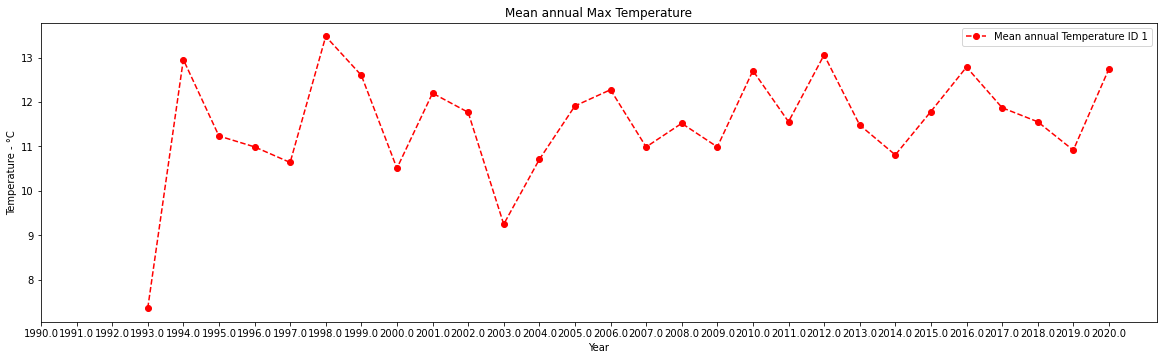

In [38]:
# Import the relevant libraries
# Let's start with one plot

import matplotlib.pyplot as plt
x = AnnualWeather10873[0]

# create an index for each tick position
xi = list(range(len(x)))
y = AnnualWeather[1]
#plt.ylim(0.8,1.4)

# Increase size of plot in jupyter
plt.rcParams["figure.figsize"] = (20,5.5)

# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Mean annual Temperature ID 1') 
plt.xlabel('Year')
plt.ylabel('Temperature - °C') 
plt.xticks(xi, x)
plt.title('Mean annual Max Temperature')
plt.legend() 
plt.show()


Slope Rimouski: 0.04077031179367311 degrees over 30 years
Slope Richmond: 0.016085675854198834 degrees over 30 years
Slope St Anne de Bellevue: 0.045300200793494734 degrees over 30 years


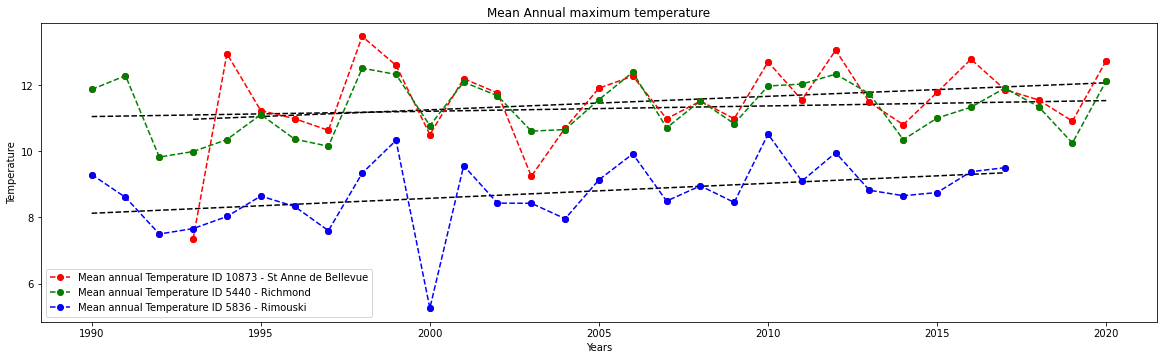

In [6]:
# Importing libraries
# Let's plot it all

import matplotlib.pyplot as plt
import numpy as np
import math

# Increase size of plot in jupyter
plt.rcParams["figure.figsize"] = (20,5.5)
#plt.ylim(0.8,1.4)

# Set X values
x = AnnualWeather10873[0]

  
# Assign variables to the y axis part of the curve
y = AnnualWeather10873[1] #1
z = AnnualWeather5440[1] #2
p = AnnualWeather5836[1] #3

# Prepare data for regression lines / plot all lines simultaneously
yclean = AnnualWeather10873clean[1]
xclean1 = AnnualWeather10873clean[0]
m1, b1 = np.polyfit(xclean1, yclean, 1)
plt.plot(xclean1, yclean, 'ro', xclean1, m1*xclean1+b1, '--k')
print('Slope Rimouski:', m1,'degrees over 30 years')

zclean = AnnualWeather5440clean[1]
xclean2 = AnnualWeather5440clean[0]
m2, b2 = np.polyfit(xclean2, zclean, 1)
plt.plot(xclean2, zclean, 'ro', xclean2, m2*xclean2+b2, '--k')
print('Slope Richmond:', m2, 'degrees over 30 years')

pclean = AnnualWeather5836clean[1]
xclean3 = AnnualWeather5836clean[0]
m3, b3 = np.polyfit(xclean3, pclean, 1)
plt.plot(xclean3, pclean, 'ro', xclean3, m3*xclean3+b3, '--k')
print('Slope St Anne de Bellevue:', m3,'degrees over 30 years')

###############################################
    
# Plotting all the curves simultaneously
#plt.plot(x, y, color='r', label='10873')
plt.plot(x, y, marker='o', linestyle='--', color='r', label='Mean annual Temperature ID 10873 - St Anne de Bellevue') 

#plt.plot(x, z, color='g', label='5440')
plt.plot(x, z, marker='o', linestyle='--', color='g', label='Mean annual Temperature ID 5440 - Richmond') 

#plt.plot(x, p, color='b', label = '5836')
plt.plot(x, p, marker='o', linestyle='--', color='b', label='Mean annual Temperature ID 5836 - Rimouski') 
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("Mean Annual maximum temperature")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

## *Where are these stations?*

In [3]:
# Import libraries
# Code from https://github.com/collinreinking/longitude_latitude_dot_plots_in_python_with_folium.git

import pandas as pd
import folium

# Site coordinates
# 10873 -73.93 45.43
# 5440 -72.13 45.63
# 5836 -68.52 48.45

# create lists and convert to df  
name = ['St Anne de Bellevue', 'Richmond', 'Rimouski']
lat = [45.43, 45.63, 48.45]
lon = [-73.93,-72.13, -68.52]
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
data = pd.DataFrame(list(zip(name, lat, lon)),
               columns =['Name', 'latitude', 'longitude'])
data

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
data.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
#this_map.save('html_map_output/simple_dot_plot.html')

this_map

## 5.2 Your turn!
Try to map or plot the data for one other station!